In [1]:
import os
from cmdstanpy import cmdstan_path, CmdStanModel

In [ ]:
# Installation of [```cmdstanpy```](https://cmdstanpy.readthedocs.io/en/v0.9.68/index.html)
# 1. Install ```cmdstanpy``` package
# 2. Install cmdstan
# 2. Create a dataset (as a dictionary) of F+L binary samples with F zeros and L ones, with F=number of letters in first name, L=number of letters in last name. Dictionary needs to consist of N=F+L, and y = list of samples.
# 3. Create a cmdstanpy model from ```bern_1.stan``` code provided.
# 4. Sample from the model using the dataset and ```.sample()``` method
# 5. Extract $\theta$ variable and create its histogram.
# 6. Using ```.summary()``` method get mean, median and 5% and 95% quantiles of theta, and mark them on the histogram.

In [15]:
# N = 14
# F = 7 // Dominik
# L = 7 // Wozniak
data = {
  'N': 14,
  'y': [0,1,1,1,0,1,1,0,0,1,0,0,1,1]
}

In [16]:
bernoulli_model = CmdStanModel(stan_file='bern_1.stan')

INFO:cmdstanpy:compiling stan file /Users/dominikwozniak/study/data_analytics/bern_1.stan to exe file /Users/dominikwozniak/study/data_analytics/bern_1
INFO:cmdstanpy:compiled model executable: /Users/dominikwozniak/study/data_analytics/bern_1


In [43]:
bern_fit = bernoulli_model.sample(data=data, output_dir='results')

INFO:cmdstanpy:created output directory: /Users/dominikwozniak/study/data_analytics/results
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [18]:
print(bern_fit)

CmdStanMCMC: model=bern_1 chains=4['method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	/Users/dominikwozniak/study/data_analytics/bern_1-20220305104405_1.csv
	/Users/dominikwozniak/study/data_analytics/bern_1-20220305104405_2.csv
	/Users/dominikwozniak/study/data_analytics/bern_1-20220305104405_3.csv
	/Users/dominikwozniak/study/data_analytics/bern_1-20220305104405_4.csv
 output_files:
	/Users/dominikwozniak/study/data_analytics/bern_1-20220305104405_0-stdout.txt
	/Users/dominikwozniak/study/data_analytics/bern_1-20220305104405_1-stdout.txt
	/Users/dominikwozniak/study/data_analytics/bern_1-20220305104405_2-stdout.txt
	/Users/dominikwozniak/study/data_analytics/bern_1-20220305104405_3-stdout.txt


In [19]:
bern_fit.draws().shape

(1000, 4, 8)

In [20]:
thetas = bern_fit.stan_variable('theta')

In [26]:
summary = bern_fit.summary()
summary.head()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-11.00,0.0150,0.66,-13.00,-11.00,-11.00,1900.0,20000.0,1.0
theta,0.57,0.0031,0.12,0.37,0.57,0.76,1500.0,16000.0,1.0


In [32]:
theta = summary.loc['theta']
theta_mean = thetas.mean()
theta_median = theta['50%']
quantile5 = theta['5%']
quantile95 = theta['95%']

In [22]:
import matplotlib.pyplot as plt

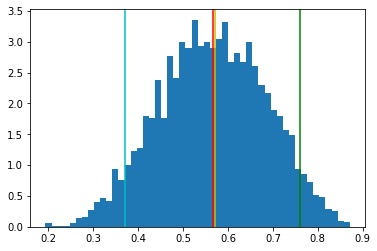

In [42]:
plt.hist(thetas, bins=50, density=True)
plt.axvline(x=theta_mean, color='r')
plt.axvline(x=theta_median, color='y')
plt.axvline(x=quantile5, color='c')
plt.axvline(x=quantile95, color='g')
plt.show()